# Regresyon Modeli 
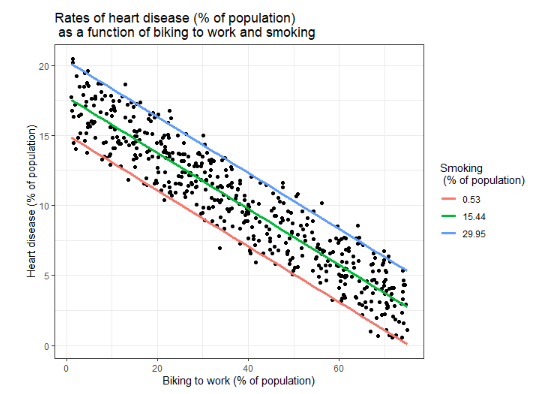 
* Bu çalışmada lineer-basit regresyon ve lineer-çoklu regresyon modellerinin mantığına değineceğim sonrasında bir örnek çalışma yapacağım. <br>
### Basit-Lineer Regresyon Modeli

Basit lineer regresyon, bir bağımlı değişkenin bir bağımsız değişkene bağlı olduğu bir regresyon modelidir. Bu model, bağımsız değişkenin etkisi altında olan bağımlı değişkenin değişimini açıklamak için kullanılır. Basit lineer regresyon modeli, bağımlı değişkenin doğrusal olarak bağımsız değişkene bağlı olduğu bir doğru denklemi kullanarak hesaplanır. Bu denklem genellikle "y = mx + b" şeklinde yazılır, burada y bağımlı değişkeni, x bağımsız değişkeni, m eğimi ve b y-kesiti temsil eder. <br>

Basit lineer regresyon, özellikle bir bağımlı değişkenin tek bir bağımsız değişkene bağlı olduğu durumlarda kullanılır. Bu modelin temel amacı, bağımsız değişkenin bağımlı değişkendeki değişimleri açıklamasına yardımcı olmaktır. Bu modelin önemli bir kullanım alanı, bağımsız değişkenin etkisini incelemek ve gelecekteki değerleri tahmin etmek için kullanılan öngörü modelleridir.

### Çoklu-Lineer Regresyon Modeli

Çoklu lineer regresyon modeli, birden fazla bağımsız değişkenin kullanıldığı bir regresyon modelidir. Basit lineer regresyonda sadece bir bağımsız değişken kullanılırken, çoklu lineer regresyonda birden fazla bağımsız değişken kullanılır.

Bu modelde, bağımlı değişkenin tahmin edilmesinde birden fazla bağımsız değişkenin etkisi hesaba katılır ve bu değişkenler arasındaki ilişki incelenir. Bu ilişki, bağımsız değişkenlerin katsayıları yoluyla ifade edilir.

Çoklu lineer regresyon modeli, pek çok alanda kullanılır, örneğin ekonomi, finans, pazarlama, mühendislik, sosyal bilimler ve sağlık gibi birçok alanda uygulanabilir.


Python kütüphaneleri kullanarak bu analizi gerçekleştirmek için öncelikle gerekli import işlemlerini yapmamız gerekir:

In [36]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import seaborn as sns

* Veri setimizi dataframe'e okuyalım: <br>
_Veri setini indirmek için :_ [Veri Seti Link](https://www.kaggle.com/datasets/gauravbr/multiple-linear-regression-housing-price-detection) <br>


In [31]:
df = pd.read_csv('data/housing.csv')
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


 Herhangi bir veri seti üzerinde analiz yapmadan önce veri setini tanımak çok önemlidir. Veri setinde her bir satır bir evi temsil ediyor ve sütunlar farklı özellikleri içeriyor: <br>
        + "Price" sütunu, ev fiyatını ifade ediyor. <br>
        + "Area", evin metrekare cinsinden büyüklüğünü ifade ediyor. <br>
        + "Bedrooms" sütunu, evdeki yatak odası sayısını ifade ediyor. <br>
        + "Bathrooms" sütunu, evdeki banyo sayısını ifade ediyor. <br>
        + "Stories" sütunu, evin kat sayısını ifade ediyor. <br>
        + "Mainroad", evin ana yola ne kadar yakın olduğunu ifade eden bir sütun. Bu sütunun değeri evin ana yola yakın mı uzak mı olduğunu belirtebilir. <br>
        + "Guestroom", evin misafir odası olup olmadığını ifade eden bir sütun. <br>
        + "Basement", evin bodrum katı olup olmadığını ifade eden bir sütun. <br>
        + "Hotwaterheating", evde sıcak suyun olup olmadığını ifade eden bir sütun. <br>
        + "Airconditioning", evde klimanın olup olmadığını ifade eden bir sütun. <br>
        + "Parking", evdeki araç park yeri sayısını ifade ediyor. <br>
        + "Prefarea", evin tercih edilen bir bölgede olup olmadığını ifade eden bir sütun. <br>
        + "Furnishingstatus", evin mobilya durumunu ifade eden bir sütun. Bu sütunun değeri evin tamamen mobilyalı olup olmadığını veya kısmen mobilyalı olup olmadığını belirtebilir. <br>
* Veri setimizin satır ve sütun sayısına bakalım:

In [34]:
df.shape

(545, 13)

### Regresyon Analizi Detayları :
   * Bağımlı değişken, bizim analizimizde "Price" yani ev fiyatı olacak. Bağımsız değişkenler ise, "Area", "Bedrooms", "Bathrooms", "Stories" ve "Parking" olacak.

   * Bağımsız değişkenleri seçerken, ev fiyatını etkileyebilecek faktörleri dikkate almanız gerekir. Örneğin, evin büyüklüğü (Area), yatak odası sayısı (Bedrooms), banyo sayısı (Bathrooms), kat sayısı (Stories) ve park yeri sayısı (Parking) ev fiyatını etkileyebilecek faktörlerdir.

   * Model oluştururken seçeceğimiz bağımsız değişkenlerin, ev fiyatını etkileme olasılığı yüksek olan faktörler olmasına dikkat etmeniz gerekiyor. 

* Regresyon analizine başlamadan önce NaN verileri temizleme gibi hazırlık işlemleri yapılması gerekir. NaN veriler var mı diye kontrol ediyoruz:

In [35]:
df.isnull().sum().sort_values(ascending = False)

furnishingstatus    0
prefarea            0
parking             0
airconditioning     0
hotwaterheating     0
basement            0
guestroom           0
mainroad            0
stories             0
bathrooms           0
bedrooms            0
area                0
price               0
dtype: int64

* Verimizde NaN değer bulunmuyor. 
* İkinci önemli husus, regresyon analizi için bağımlı değişkenin normal dağılım göstermesi arzu edilir. Normal dağılım, verilerin ortalama değerin etrafında simetrik olarak dağıldığı bir dağılım şeklidir. Bu dağılım şekli, regresyon analizi için matematiksel işlemleri daha kolay ve doğru hale getirir. Bağımlı değişken olarak seçtiğimiz "price" değişkeninin histogram grafiğini çidirip normal dağıldığını görelim:

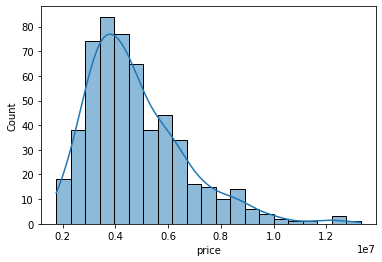

In [39]:
sns.histplot(df['price'], kde=True)
plt.show()

* Regrasyon uygulayacağımız verileri yeni bir dataframe'e aktaralım.

In [40]:
reg_df = df[["area", "bedrooms", "bathrooms", "stories", "parking", "price"]]
reg_df.head(10)

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000
5,7500,3,3,1,2,10850000
6,8580,4,3,4,2,10150000
7,16200,5,3,2,0,10150000
8,8100,4,1,2,2,9870000
9,5750,3,2,4,1,9800000


* Ana verimizi %80'e %20 boyutunda olacak şekilde ikiye ayırıyoruz Train ve Test Data Setleri için:

In [41]:
msk = np.random.rand(len(df)) <= 0.8
train = reg_df[msk]
test = reg_df[~msk]
print(f'Train data set shape: {train.shape}')
print(f'Test data set shape: {test.shape}')

Train data set shape: (447, 6)
Test data set shape: (98, 6)


In [42]:
reg = linear_model.LinearRegression()
train_x = np.asanyarray(train[["area", "bedrooms", "bathrooms", "stories", "parking"]])
train_y = np.asanyarray(train[['price']])
reg.fit(train_x, train_y)
print('Coefficient of area : %.2f' % reg.coef_[0][0])
print('Coefficient of bedrooms : %.2f' % reg.coef_[0][1])
print('Coefficient of bathrooms : %.2f' % reg.coef_[0][2])
print('Coefficient of stories : %.2f' % reg.coef_[0][3])
print('Coefficient of parking : %.2f' % reg.coef_[0][4])
print('Intercept: %.2f' % reg.intercept_)

Coefficient of area : 337.57
Coefficient of bedrooms : 158746.42
Coefficient of bathrooms : 1095613.19
Coefficient of stories : 527840.61
Coefficient of parking : 359939.85
Intercept: -75317.00


* Evlerin fiyatı ile özellikleri arasındaki ilikşiyi belirlemek için modelimizin oluşturduğu aşağıdaki denklemi kullanabilirim: <br>
price = -75317.00 + (337.57 * area) + (158746.42 * bedrooms) + (1095613.19 * bathrooms) + (527840.61 * stories) + (359939.85 * parking)

* Yorum : Bu regresyon modelinin katsayılarına bakarak, ev fiyatlarını tahmin etmek için kullanılan beş bağımsız değişkenin (area, bedrooms, bathrooms, stories, parking) tümü pozitif yönlü etkisinin olduğu görülüyor. Katsayı değerleri arasında en büyük etkiye sahip değişken, bathrooms'dır. Bunun anlamı, banyo sayısı arttıkça ev fiyatının da artacağıdır.Ancak, bu katsayıların etkililiğini değerlendirmek için modelin R-kare değeri de göz önünde bulundurulmalıdır. R-kare değeri, modelin bağımlı değişkendeki değişkenliği açıklama oranını gösterir. Yüksek bir R-kare değeri, modelin verileri iyi açıkladığı ve tahmin gücünün yüksek olduğu anlamına gelir.

* Oluşturduğumuz regresyon modelini test edelim ve sonrasında r kare değerini bulalım:

In [43]:
test_x = np.asanyarray(test[["area", "bedrooms", "bathrooms", "stories", "parking"]])
test_y = np.asanyarray(test[['price']])
test_pred = reg.predict(test_x)
# modelimiz oluşan yukarıdaki denkleme göre ana verimizin %20'sinde kalan age, body, rating değerlerini kullanarak kendisi
# price değerleri üretti. Bu değerleri görüntüleyelim:
test_pred

array([[7418180.27375828],
       [9574111.79650462],
       [6165169.98883555],
       [7004485.6743104 ],
       [6280885.68306807],
       [6255191.30848963],
       [6734172.01682243],
       [6023158.05922226],
       [6690776.4052134 ],
       [5813863.87907384],
       [7115307.60769396],
       [8620278.53405128],
       [4763308.4192472 ],
       [7607564.75913956],
       [5459326.12796849],
       [7574981.100844  ],
       [6102975.95689416],
       [6033197.26708513],
       [4409743.46524354],
       [8607692.50040912],
       [5244629.84996131],
       [4668411.93671647],
       [4937584.07614416],
       [6920092.85973442],
       [4692474.43541507],
       [3959976.75437015],
       [8010367.39392516],
       [5296639.05789282],
       [4835427.83143754],
       [5864411.63793318],
       [5506705.98349184],
       [5857428.21164146],
       [5862961.83451419],
       [5377311.57915467],
       [4149016.65902033],
       [5850835.16694292],
       [5342669.58610885],
 

* Son olarak modelimizin güvenilirliğini ölçmek için r-kare analizi ile test verimizdeki gerçek price değerleri ile modelimizin
 bulduğu price değerlerini kıyaslayalım:

In [44]:
r2_score(test_pred, test_y)

0.19709574168796573

* R kare değerinin en yüksek olabileceği değer 1 (en optimum durum) ve en düşük olabileceği değer 0'dır.
* R-kare değerinin düşük olması nedeniyle, bu denklem tahminlerin doğruluğu konusunda sınırlı güvenilirlik sağlayabilir.
* Bu R-kare değeri, modelin yalnızca %19.7'sinin bağımlı değişkendeki değişkenliği açıkladığını gösterir. Bu, modelin verileri düşük bir başarı oranıyla açıkladığı anlamına gelir ve modelin tahmin gücünün sınırlı olduğu düşünülebilir. Daha yüksek bir R-kare değeri arzu edilir ve model iyileştirilebilir, örneğin, daha fazla veya daha uygun bağımsız değişkenler eklenerek veya mevcut değişkenlerin daha doğru bir şekilde ölçülmesi sağlanarak.